# A set of visualization to ensure the correctness of program

In [1]:
from utils.data import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%qtconsole

### Visualize the open, high, low, close of 16 target stocks from 2012-8-13 to 2017-8-11

In [2]:
history, abbreviation = read_stock_history(filepath='utils/datasets/stocks_history_target.h5')
history = history[:, :, :]
# delete ebay
# history = np.delete(history, 7, axis=0)
# abbreviation.pop(7)
history_T = history.transpose((0, 2, 1))
# create x tick
date_list = [index_to_date(i) for i in range(history.shape[1])]
x = range(history.shape[1])

In [4]:
print(date_list[0], date_list[-1])

2012-08-13 2017-08-11


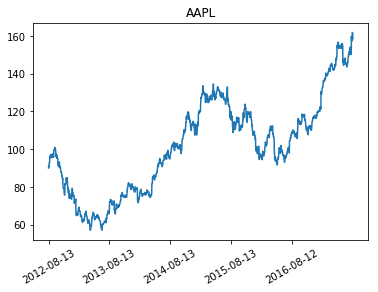

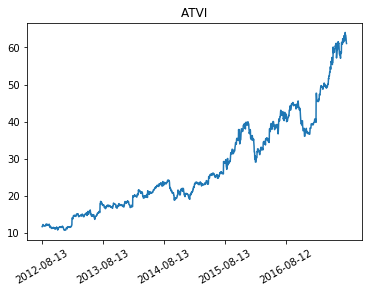

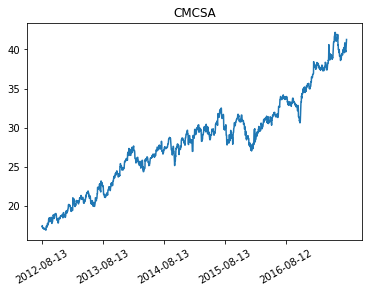

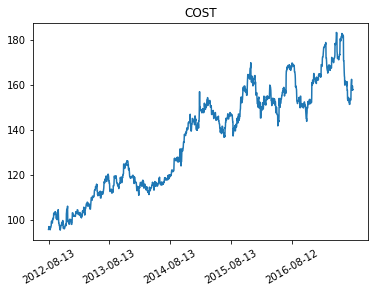

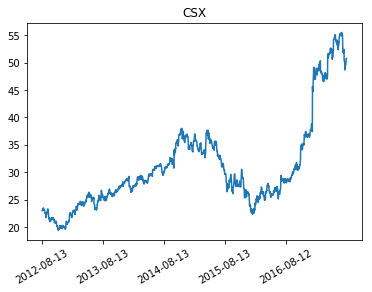

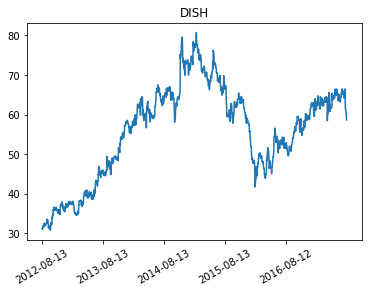

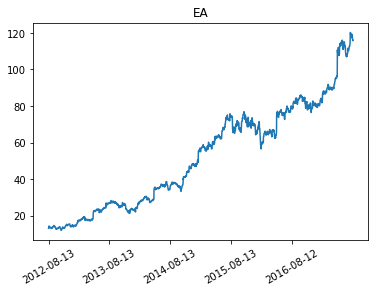

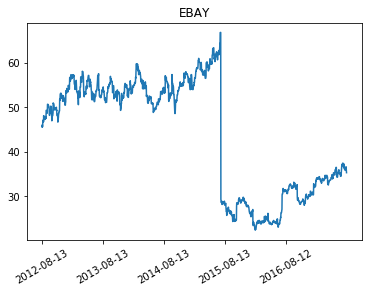

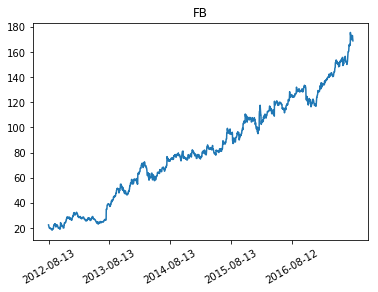

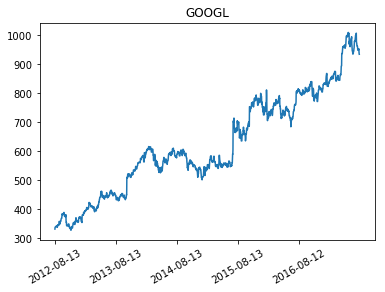

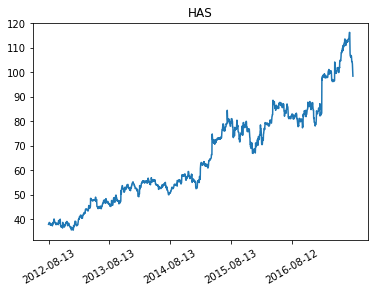

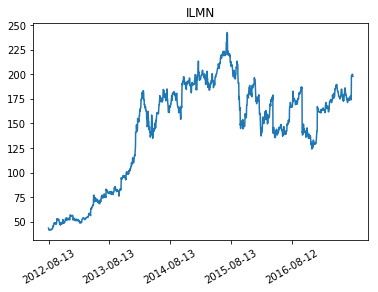

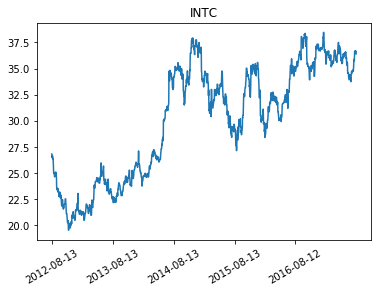

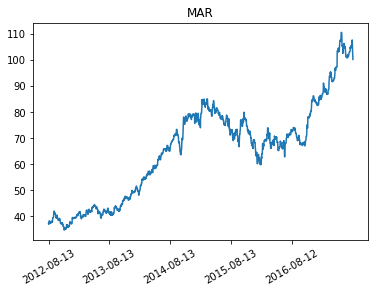

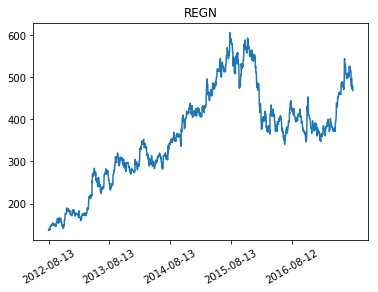

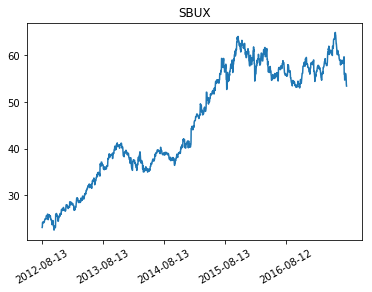

In [5]:
### show 16 stock of open price
for i in range(len(abbreviation)):
    plt.figure(i)
    plt.plot(x, history_T[i][1])  # open, high, low, close = [0, 1, 2, 3]
    plt.xticks(x[::365], date_list[::365], rotation=30)
    plt.title(abbreviation[i])
    plt.show()

### Plot a random action chosen on 16 stocks to test the simulator

In [6]:
from environment.portfolio import *

In [7]:
env = PortfolioEnv(history, abbreviation)

In [9]:
for i in range(365):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break

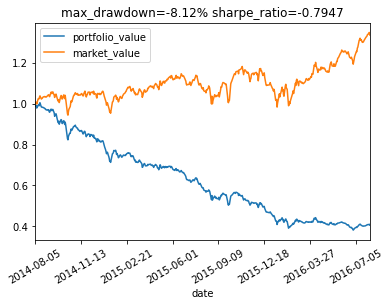

In [10]:
env.render()

In [11]:
obs = env.reset()

Start date: 2015-07-27


### We don't make any investment to make sure the profit doesn't change. In reality, there is a $eps$ change from 1 because we introduce $eps$ to avoid zero division.

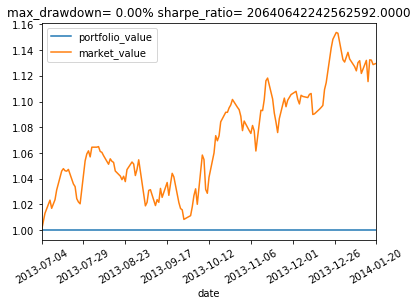

In [11]:
env = PortfolioEnv(history, abbreviation)
for i in range(200):
    action = np.array([1.0] + history.shape[0] * [0.0])
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render()

### Try equally invest everything, the expected curve should match market_value

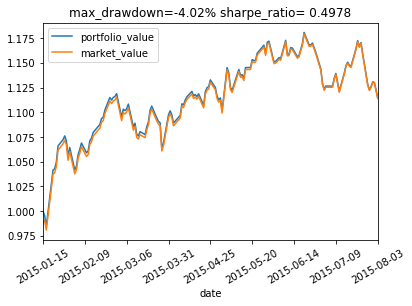

In [12]:
env = PortfolioEnv(history, abbreviation)
for i in range(200):
    action = np.ones((history.shape[0] + 1)) / (history.shape[0] + 1)
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render()